# 칵테일 이미지에서 색상 추출

In [ ]:
import pandas as pd

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/img.csv')
csv_file

,Unnamed: 0,cocktail_id,name,img,url
0,0,0,The Missionary,https://kindredcocktails.com/sites/kindredcock...,https://kindredcocktails.com/cocktail/missionary
1,1,1,Missionary's Downfall (Don the Beachcomber),https://kindredcocktails.com/sites/kindredcock...,https://kindredcocktails.com/cocktail/missiona...
2,2,2,Mode Pour les Jeunes,https://kindredcocktails.com/sites/kindredcock...,https://kindredcocktails.com/cocktail/mode-pou...
3,3,3,Mizz Mazza,https://kindredcocktails.com/sites/kindredcock...,https://kindredcocktails.com/cocktail/mizz-mazza
4,4,4,"Mockingbird, Wish Me Luck",https://kindredcocktails.com/sites/kindredcock...,https://kindredcocktails.com/cocktail/mockingb...
...,...,...,...,...,...
3671,3671,3671,Gin Cocktail,https://cdn.diffords.com/contrib/stock-images/...,https://www.diffordsguide.com/cocktails/recipe...
3672,3672,3672,Velasco and Sand,https://cdn.diffords.com/contrib/stock-images/...,https://www.diffordsguide.com/cocktails/recipe...
3673,3673,3673,The Savelberg,https://cdn.diffords.com/contrib/stock-images/...,https://www.diffordsguide.com/cocktails/recipe...
3674,3674,3674,Flying Frenchman (Absinthe Espresso Martini),https://cdn.diffords.com/contrib/stock-images/...,https://www.diffordsguide.com/cocktails/recipe...


In [ ]:
csv_file['cocktail_id'][100]

100

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
img = csv_file['img'][0]

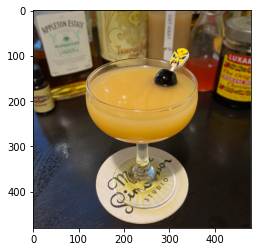

<Figure size 432x288 with 0 Axes>

In [ ]:
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/image/254.jpg')
plt.imshow(img_test)
plt.show()
plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')

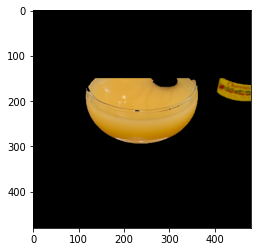

<Figure size 432x288 with 0 Axes>

In [ ]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('/content/drive/MyDrive/[SSAFY] 특화프로젝트/image/254.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (100, 150, 2506, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()
plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')

# 이미지 내 주요 색 추출

In [ ]:
!pip install colorthief

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(4, 5, 4)
[(6, 6, 4), (169, 187, 104), (93, 143, 19), (108, 108, 76)]


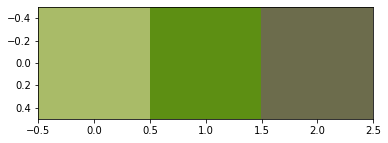

In [ ]:
from colorthief import ColorThief
import matplotlib.pyplot as plt

color_thief = ColorThief("/content/drive/MyDrive/[SSAFY] 특화프로젝트/image/1.jpg")

# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# dominant_color는 (R, G, B)로 구성된 3 x 1 tuple을 return

palette = color_thief.get_palette(color_count=3)
# palette 는 N개의 컬러를 list에 담아 return

print(dominant_color)
#(111, 195, 227)

print(palette)
#[(20, 17, 21), (111, 195, 227), (194, 81, 78), (91, 145, 145)]
plt.imshow([[palette[i] for i in range(1, len(palette))]])

## 이미지 보기

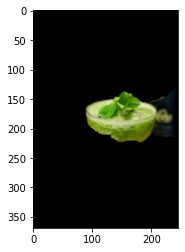

In [ ]:
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/image/1.jpg')
plt.imshow(img_test)
plt.show()

In [ ]:
# 빨강색(0), 주황색(1), 노랑색(2), 초록색(3), 파랑색(4), 남색(5), 보라색(6)
main_colors = [(255, 0, 0), (255, 50, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 5, 255), (100, 0, 255)]
main_colors

[(255, 0, 0),
 (255, 50, 0),
 (255, 255, 0),
 (0, 255, 0),
 (0, 0, 255),
 (0, 5, 255),
 (100, 0, 255)]

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

In [ ]:
# m = main_colors[4]
p =  palette[2]
# print("메인색: ", m)
print("칵테일색: ", p)
for index, value in enumerate(main_colors):
  m = main_colors[index]
  print(index," : ",cosine_similarity(m, p))

칵테일색:  (93, 143, 19)
0  :  0.5418436003621996
1  :  0.6920301000993752
2  :  0.9722725060369913
3  :  0.8331573639977907
4  :  0.11069923018152464
5  :  0.1270112355828643
6  :  0.30087835745448027


In [ ]:
# 데이터를 가져온다
# 칵테일 사진을 가져온다
# 칵테일 색상울 추출한다
# 앞에서 2개를 고르고 각각의 색에 대해여 가장 가까운 대표색을 찾는다
# 저장한다


# 배경 제거 테스트

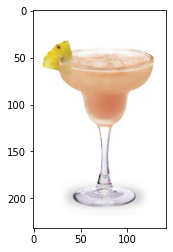

In [ ]:
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/1595.jpg')
plt.imshow(img_test)
plt.show()

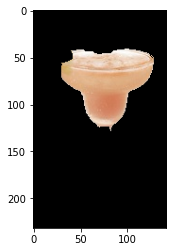

In [ ]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/1595.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (30, 30, 200, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()
# plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')

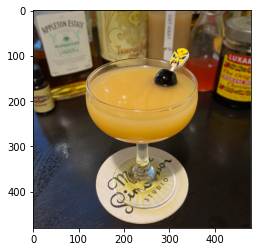

In [ ]:
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/image/254.jpg')
plt.imshow(img_test)
plt.show()

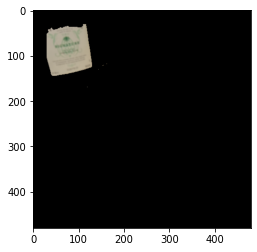

In [ ]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('/content/drive/MyDrive/[SSAFY] 특화프로젝트/image/254.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
# rectangle = (100, 200, 2506, 150)
rectangle = (30, 30, 200, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()
# plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')

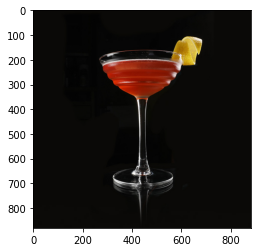

In [ ]:
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/3447.jpg')
plt.imshow(img_test)
plt.show()

(52, 44, 39)
[(77, 63, 46), (214, 177, 102), (173, 163, 132), (173, 169, 160)]


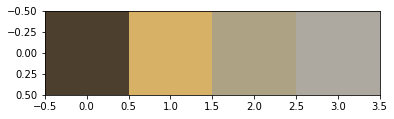

In [ ]:
from colorthief import ColorThief
import matplotlib.pyplot as plt

color_thief = ColorThief("/content/drive/MyDrive/[SSAFY] 특화프로젝트/image/254.jpg")

# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# dominant_color는 (R, G, B)로 구성된 3 x 1 tuple을 return

palette = color_thief.get_palette(color_count=3)
# palette 는 N개의 컬러를 list에 담아 return

print(dominant_color)
#(111, 195, 227)

print(palette)
#[(20, 17, 21), (111, 195, 227), (194, 81, 78), (91, 145, 145)]
plt.imshow([[palette[i] for i in range(0, len(palette))]])

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

In [ ]:
# 빨강색(0), 주황색(1), 노랑색(2), 초록색(3), 파랑색(4), 남색(5), 보라색(6)
main_colors = [(255, 0, 0), (255, 50, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 5, 255), (100, 0, 255)]
main_colors

# m = main_colors[4]
p =  palette[0]
# print("메인색: ", m)
print("칵테일색: ", p)
for index, value in enumerate(main_colors):
  m = main_colors[index]
  print(index," : ",cosine_similarity(m, p))

칵테일색:  (13, 11, 6)
0  :  0.7200034083082247
1  :  0.8237746092177455
2  :  0.9399125399855488
3  :  0.6092336531838825
4  :  0.3323092653730268
5  :  0.3441888649185551
6  :  0.5722352847513288


In [ ]:
main_colors = [(255, 0, 0), (255, 50, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 5, 255), (100, 0, 255)]
main_colors_name = ['빨강색', '주황색', '노랑색', '초록색', '파랑색', '남색', '보라색']
main_colors

[(255, 0, 0),
 (255, 50, 0),
 (255, 255, 0),
 (0, 255, 0),
 (0, 0, 255),
 (0, 5, 255),
 (100, 0, 255)]

In [ ]:
# 빨강색(0), 주황색(1), 노랑색(2), 초록색(3), 파랑색(4), 남색(5), 보라색(6)


-+********************************************************


In [ ]:
get_color(palette[1])

0  :  0.723332185501304
1  :  0.8249316337677798
2  :  0.9345139230215747
3  :  0.5982700786622934
4  :  0.3447658080426776
5  :  0.3564280829740022
6  :  0.5850472871619927


'노랑색'

# 칵테일 이미지에서 색상 2개 추출 후 csv로 저장

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from colorthief import ColorThief

In [ ]:
# 데이터 프레임 생성
img_new = dict()
img_new['cocktail_id'] = []
img_new['name'] = []
img_new['cocktail_color1'] = []
img_new['cocktail_color2'] = []
img_new['url'] = []

In [ ]:
# 이미지에서 색상 2개 추출
color_thief = ColorThief("/content/drive/MyDrive/[SSAFY] 특화프로젝트/image/0.jpg")

palette = color_thief.get_palette(color_count=3) # palette 는 N개의 컬러를 list에 담아 return

print(palette)

color_1 = get_color(palette[1])
color_2 = get_color(palette[2])
print(color_1)
print(color_2)

[(4, 4, 4), (149, 132, 115), (105, 100, 86), (92, 92, 92)]
노랑색
노랑색


In [ ]:
# 데이터 변수에 넣기
img_new['cocktail_color1'].append(color_1)
img_new['cocktail_color2'].append(color_2)
img_new['cocktail_id'].append('0id')
img_new['name'].append('0name')
img_new['url'].append('0url')

In [ ]:
# 데이터 저장
pd.DataFrame.from_dict(img_new).to_csv("/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/img_new.csv", encoding = "utf-8-sig")

In [ ]:
# 저장한 데이터 읽기
csv_file = pd.read_csv('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/img_new.csv')
csv_file

,Unnamed: 0,cocktail_id,name,cocktail_color1,cocktail_color2,url
0,0,0id,0name,노랑색,노랑색,0url


# 첫번째 구역

In [1]:
!pip install colorthief

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from colorthief import ColorThief

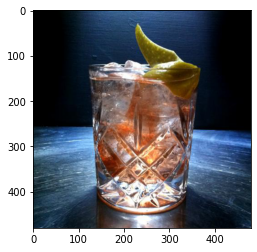

In [12]:
# 사진 출력
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/6.jpg')
plt.imshow(img_test)
plt.show()

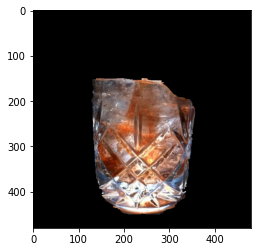

In [21]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/6.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  , 가로, 세로
# rectangle = (100, 200, 2506, 150)
rectangle = (100, 150, 300, 300)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()
# plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')

# 두번째 구역

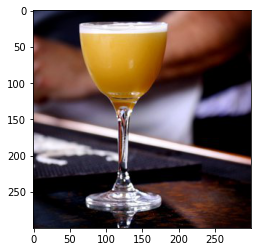

In [22]:
# 사진 출력
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/1129.jpg')
plt.imshow(img_test)
plt.show()

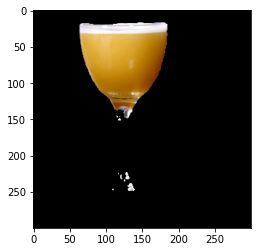

In [25]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/1129.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  , 가로, 세로
# rectangle = (100, 200, 2506, 150)
rectangle = (50, 0, 150, 250)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()
# plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')

# 세번째 구역

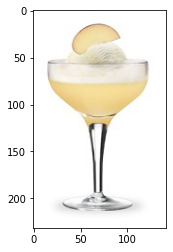

In [26]:
# 사진 출력
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/1373.jpg')
plt.imshow(img_test)
plt.show()

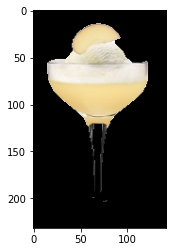

In [27]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/1373.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  , 가로, 세로
# rectangle = (100, 200, 2506, 150)
rectangle = (10, 10, 130, 200)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()
# plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')

# 네번째 구역

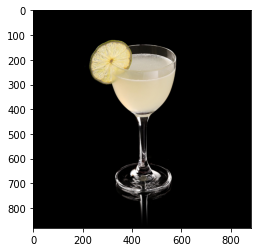

In [28]:
# 사진 출력
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/2999.jpg')
plt.imshow(img_test)
plt.show()

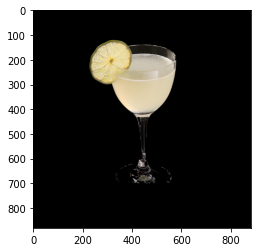

In [29]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/2999.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  , 가로, 세로
# rectangle = (100, 200, 2506, 150)
rectangle = (200, 100, 400, 600)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()
# plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')

# 다섯번째 구역

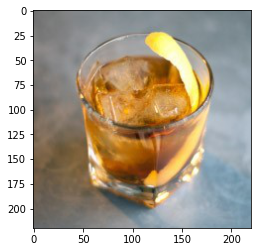

In [30]:
# 사진 출력
img_test = Image.open('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/3659.jpg')
plt.imshow(img_test)
plt.show()

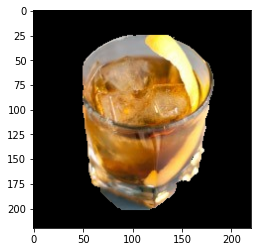

In [31]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/3659.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  , 가로, 세로
# rectangle = (100, 200, 2506, 150)
rectangle = (50, 25, 150, 180)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()
# plt.savefig('/content/drive/MyDrive/[SSAFY] 특화프로젝트/data/254.jpg')